In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/Session10')

In [3]:
!pip install torch_lr_finder
!pip install torchsummary

In [4]:
from model import Net_10
from utils import (
   test,
   train,
   load_data,
   visualise_input
)

from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms

from torchsummary import summary
from torchvision import datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch_lr_finder import LRFinder

In [5]:
SEED = 1
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
# For reproducibility
torch.manual_seed(SEED)

if cuda:
  torch.cuda.manual_seed(SEED)


CUDA Available? True


In [6]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
_model = Net_10().to(device)
summary(_model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1,

In [7]:
train_loader, test_loader = load_data()

100%|██████████| 170498071/170498071 [00:13<00:00, 12728603.00it/s]


Extracting ../data/cifar-10-python.tar.gz to ../data
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.63E-02


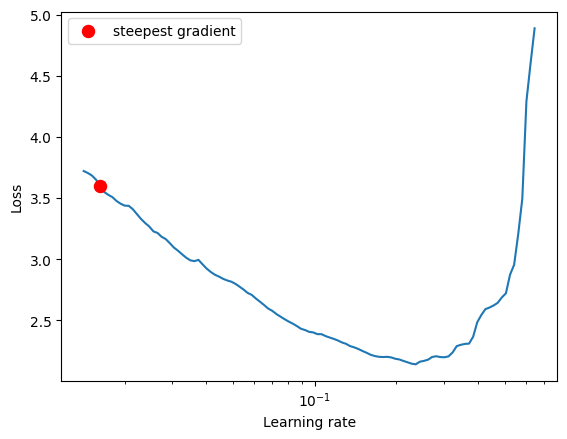

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(_model.parameters(), lr=0.01, weight_decay=1e-4)
lr_finder = LRFinder(_model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=10, num_iter=200,step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [ ]:
EPOCHS = 24
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,  max_lr= 1.63E-02,
                                          pct_start = 5/EPOCHS, div_factor = 100,
                                          epochs=24, steps_per_epoch=len(train_loader),
                                          three_phase=False, verbose = True)


for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(_model, device, train_loader, optimizer, epoch, criterion, scheduler)
    test(_model, device, test_loader,criterion)


EPOCH: 0


Train: Loss=1.2260948419570923 Batch_id=97 Accuracy=42.29: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]



Test set: Average loss: 0.0027, Accuracy: 5610/10000 (56.10%)

EPOCH: 1


Train: Loss=0.9372470378875732 Batch_id=97 Accuracy=61.90: 100%|██████████| 98/98 [00:19<00:00,  5.11it/s]



Test set: Average loss: 0.0020, Accuracy: 6770/10000 (67.70%)

EPOCH: 2


Train: Loss=1.0207184553146362 Batch_id=97 Accuracy=66.82: 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]



Test set: Average loss: 0.0022, Accuracy: 6664/10000 (66.64%)

EPOCH: 3


Train: Loss=0.85723477602005 Batch_id=97 Accuracy=69.80: 100%|██████████| 98/98 [00:19<00:00,  5.12it/s]



Test set: Average loss: 0.0013, Accuracy: 7806/10000 (78.06%)

EPOCH: 4


Train: Loss=0.6448763608932495 Batch_id=97 Accuracy=74.20: 100%|██████████| 98/98 [00:19<00:00,  5.10it/s]



Test set: Average loss: 0.0016, Accuracy: 7453/10000 (74.53%)

EPOCH: 5


Train: Loss=0.6581353545188904 Batch_id=97 Accuracy=77.05: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]



Test set: Average loss: 0.0013, Accuracy: 7951/10000 (79.51%)

EPOCH: 6


Train: Loss=0.6441969871520996 Batch_id=97 Accuracy=78.40: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]



Test set: Average loss: 0.0014, Accuracy: 7800/10000 (78.00%)

EPOCH: 7


Train: Loss=0.6372077465057373 Batch_id=97 Accuracy=79.41: 100%|██████████| 98/98 [00:19<00:00,  5.14it/s]



Test set: Average loss: 0.0012, Accuracy: 7989/10000 (79.89%)

EPOCH: 8


Train: Loss=0.5269209146499634 Batch_id=97 Accuracy=79.86: 100%|██████████| 98/98 [00:19<00:00,  5.09it/s]



Test set: Average loss: 0.0012, Accuracy: 8095/10000 (80.95%)

EPOCH: 9


Train: Loss=0.5554923415184021 Batch_id=97 Accuracy=80.81: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]



Test set: Average loss: 0.0009, Accuracy: 8437/10000 (84.37%)

EPOCH: 10


Train: Loss=0.5717962980270386 Batch_id=97 Accuracy=81.50: 100%|██████████| 98/98 [00:19<00:00,  5.11it/s]



Test set: Average loss: 0.0009, Accuracy: 8406/10000 (84.06%)

EPOCH: 11


Train: Loss=0.4982632100582123 Batch_id=97 Accuracy=82.49: 100%|██████████| 98/98 [00:19<00:00,  5.13it/s]



Test set: Average loss: 0.0009, Accuracy: 8444/10000 (84.44%)

EPOCH: 12


Train: Loss=0.47793692350387573 Batch_id=97 Accuracy=82.39: 100%|██████████| 98/98 [00:19<00:00,  5.15it/s]



Test set: Average loss: 0.0011, Accuracy: 8157/10000 (81.57%)

EPOCH: 13


Train: Loss=0.47396400570869446 Batch_id=97 Accuracy=83.61: 100%|██████████| 98/98 [00:19<00:00,  5.09it/s]



Test set: Average loss: 0.0008, Accuracy: 8640/10000 (86.40%)

EPOCH: 14


Train: Loss=0.40271836519241333 Batch_id=97 Accuracy=84.69: 100%|██████████| 98/98 [00:19<00:00,  5.14it/s]



Test set: Average loss: 0.0009, Accuracy: 8616/10000 (86.16%)

EPOCH: 15


Train: Loss=0.4829711318016052 Batch_id=97 Accuracy=85.46: 100%|██████████| 98/98 [00:19<00:00,  5.14it/s]



Test set: Average loss: 0.0007, Accuracy: 8839/10000 (88.39%)

EPOCH: 16


Train: Loss=0.32277289032936096 Batch_id=97 Accuracy=86.61: 100%|██████████| 98/98 [00:18<00:00,  5.17it/s]



Test set: Average loss: 0.0008, Accuracy: 8736/10000 (87.36%)

EPOCH: 17


Train: Loss=0.3432263731956482 Batch_id=97 Accuracy=87.65: 100%|██████████| 98/98 [00:19<00:00,  5.09it/s]



Test set: Average loss: 0.0007, Accuracy: 8901/10000 (89.01%)

EPOCH: 18


Train: Loss=0.36517608165740967 Batch_id=97 Accuracy=88.92: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s]



Test set: Average loss: 0.0006, Accuracy: 9035/10000 (90.35%)

EPOCH: 19


Train: Loss=0.2755168080329895 Batch_id=97 Accuracy=90.62: 100%|██████████| 98/98 [00:19<00:00,  5.07it/s]



Test set: Average loss: 0.0005, Accuracy: 9134/10000 (91.34%)

EPOCH: 20


Train: Loss=0.2647594213485718 Batch_id=97 Accuracy=91.90: 100%|██████████| 98/98 [00:18<00:00,  5.17it/s]



Test set: Average loss: 0.0005, Accuracy: 9203/10000 (92.03%)

EPOCH: 21


Train: Loss=0.22395440936088562 Batch_id=97 Accuracy=92.97: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]



Test set: Average loss: 0.0005, Accuracy: 9259/10000 (92.59%)

EPOCH: 22


Train: Loss=0.13656830787658691 Batch_id=97 Accuracy=94.01: 100%|██████████| 98/98 [00:18<00:00,  5.16it/s]



Test set: Average loss: 0.0004, Accuracy: 9270/10000 (92.70%)

EPOCH: 23


Train: Loss=0.19637444615364075 Batch_id=97 Accuracy=94.33: 100%|██████████| 98/98 [00:19<00:00,  5.14it/s]



Test set: Average loss: 0.0004, Accuracy: 9267/10000 (92.67%)

